<a href="https://colab.research.google.com/github/AbdelRahmanRifai87/eng-to-fr-translation-model/blob/main/Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [1]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Getting the data

In [3]:
#Test Your Zaka
! git clone https://github.com/zaka-ai/machine_learning_certification.git
%cd machine_learning_certification/Challenge 7

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 43.23 MiB | 9.24 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (15/15), done.
/content/machine_learning_certification/Challenge 7


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [4]:
#Test Your Zaka (English)
english_path='en.csv'
df_english=pd.read_csv(english_path)


In [5]:
#Test Your Zaka (French)
french_path="fr.csv"
df_french=pd.read_csv(french_path)

**How many sentences does each of the files contain?**

In [6]:
#Test Your Zaka
fr_count=df_french.shape[0]
en_count=df_english.shape[0]
print(f"French sentences: {fr_count}")
print(f"English sentences: {en_count}")

French sentences: 137859
English sentences: 137859


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [7]:
#Test Your Zaka
df=pd.concat([df_english,df_french],axis=1)

In [8]:
df.head()

,"new jersey is sometimes quiet during autumn , and it is snowy in april .","new jersey est parfois calme pendant l' automne , et il est neigeux en avril ."
0,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
1,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
2,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
3,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
4,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."


Let's name the columns as **English** and **French** so that we access them easier.

In [9]:
#Test Your Zaka
df.columns=['English','French']

Pick a sentence and print it in both languages

In [10]:
#Test Your Zaka
english=df['English'][0]
french=df['French'][0]
print(f"English: {english}")
print(f"French: {french}")


English: the united states is usually chilly during july , and it is usually freezing in november .
French: les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [11]:
#Test Your Zaka
import re
df["English"]=[re.sub(r'[^\w\s]','',x) for x in df["English"]]
df["French"]=[re.sub(r'[^\w\s]','',x) for x in df["French"]]

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [12]:
#Test Your Zaka
print(f"English: {df['English'][0]}")
print(f"French: {df['French'][0]}")

English: the united states is usually chilly during july  and it is usually freezing in november 
French: les étatsunis est généralement froid en juillet  et il gèle habituellement en novembre 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [13]:
#Test Your Zaka
df['ENG Length']=[len(x.split()) for x in df['English']]
df['FR Length']=[len(x.split()) for x in df['French']]

In [14]:
#Test Your Zaka
df.head()

,English,French,ENG Length,FR Length
0,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
1,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
2,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
3,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14
4,his favorite fruit is the orange but my favor...,son fruit préféré est lorange mais mon préfér...,12,11


Visualize the distribution of the lengths of english sentences and french sentences.

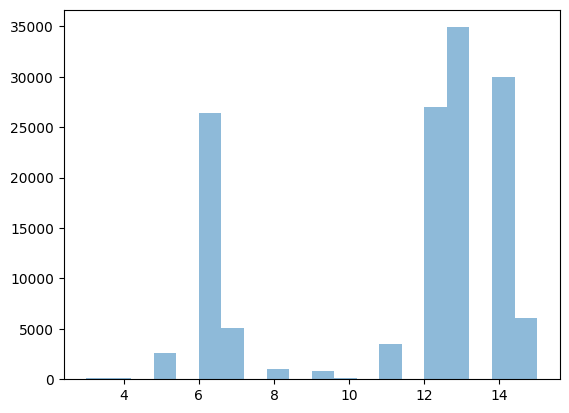

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt
plt.hist(df['ENG Length'],bins=20,alpha=0.5,label='English')
plt.show()

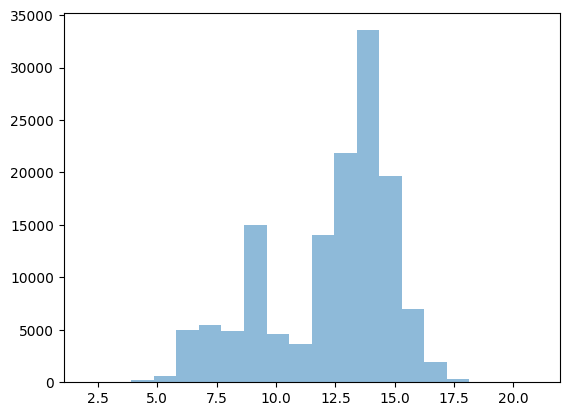

In [ ]:
#Test Your Zaka
plt.hist(df['FR Length'],bins=20,alpha=0.5,label='French')
plt.show()

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [15]:
#Test Your Zaka
max_eng=df['ENG Length'].max()
max_fr=df['FR Length'].max()
print(f"Maximum English Length: {max_eng}")
print(f"Maximum French Length: {max_fr}")

Maximum English Length: 15
Maximum French Length: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

[Share Your Zaka]false

Tokenize the sentences that we have.

In [16]:
#Test Your Zaka
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df['English Tokenized']=[word_tokenize(x) for x in df['English']]
df['French Tokenized']=[word_tokenize(x) for x in df['French']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**How many unique words do we have in english and in french?**

In [17]:
#Test Your Zaka
unique_eng=len(set([word for sentence in df['English Tokenized'] for word in sentence]))
unique_fr=len(set([word for sentence in df['French Tokenized'] for word in sentence]))

In [18]:
print(f"Unique words in English: {unique_eng}")
print(f"Unique words in French: {unique_fr}")

Unique words in English: 199
Unique words in French: 345


####Padding

**What should be the length of the sequences that we have after padding?**

[Share your Zaka]it should be the lenght of the longest sequence in the dataset

Perform padding on the sequences that we have.

In [19]:
#Test Your Zaka
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer_eng=Tokenizer()
tokenizer_fr=Tokenizer()
tokenizer_eng.fit_on_texts(df['English Tokenized'])
tokenizer_fr.fit_on_texts(df['French Tokenized'])

df['English Sequences'] = tokenizer_eng.texts_to_sequences(df['English Tokenized'])
df['French Sequences'] = tokenizer_fr.texts_to_sequences(df['French Tokenized'])

df['English Padded']=list(pad_sequences(df['English Sequences'],maxlen=max_eng,padding='post'))
df['French Padded']=list(pad_sequences(df['French Sequences'],maxlen=max_fr,padding='post'))
print(df['English Padded'])

0         [5, 20, 21, 1, 9, 62, 4, 43, 7, 3, 1, 9, 51, 2...
1         [22, 1, 9, 67, 4, 38, 7, 3, 1, 9, 68, 2, 34, 0...
2         [5, 20, 21, 1, 8, 64, 4, 34, 7, 3, 1, 57, 2, 4...
3         [29, 12, 16, 13, 1, 5, 82, 6, 30, 12, 16, 1, 5...
4         [31, 11, 13, 1, 5, 84, 6, 30, 11, 1, 5, 82, 0,...
                                ...                        
137854    [24, 1, 10, 60, 4, 38, 7, 3, 1, 8, 52, 2, 42, ...
137855    [19, 1, 8, 53, 4, 35, 7, 3, 1, 55, 2, 34, 0, 0...
137856    [19, 1, 10, 65, 4, 46, 6, 3, 1, 8, 62, 2, 37, ...
137857    [24, 1, 10, 62, 4, 36, 6, 3, 1, 10, 64, 2, 54,...
137858    [5, 84, 1, 32, 11, 13, 6, 5, 87, 1, 29, 11, 0,...
Name: English Padded, Length: 137859, dtype: object


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [20]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed

model = Sequential()
model.add(Embedding(input_dim=unique_eng, output_dim=256, input_length=max_eng))
model.add(LSTM(256))
model.add(RepeatVector(max_fr))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(unique_fr, activation='softmax')))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
#Test Your Zaka
import numpy as np

# Convert tokenized text into sequences (assuming tokenizer_eng and tokenizer_fr are already fitted)
X_train = tokenizer_eng.texts_to_sequences(df['English Tokenized'])
y_train = tokenizer_fr.texts_to_sequences(df['French Tokenized'])

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_eng, padding='post')
y_train = pad_sequences(y_train, maxlen=max_fr, padding='post')

# Reshape y_train for categorical loss (LSTM expects 3D input)
y_train = np.expand_dims(y_train, axis=-1)  # Shape: (num_samples, max_fr, 1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)




Epoch 1/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.5829 - loss: 1.8144 - val_accuracy: 0.7551 - val_loss: 0.8014
Epoch 2/50


Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
model.save("model.h5")

In [ ]:
#Test Your Zaka
def translate(input_sentence):
    # Clean the text
    input_sentence = re.sub(r'[^\w\s]', '', input_sentence)  # Remove punctuation
    input_sentence = input_sentence.lower()
    input_sentence = word_tokenize(input_sentence)  # Tokenize words
    input_sentence = " ".join(input_sentence)  # Convert list of words back to a string

    # Tokenize and pad the input sentence
    input_sequence = tokenizer_eng.texts_to_sequences([input_sentence])

    # Handle unknown words case
    if len(input_sequence[0]) == 0:
        return "Translation not available (unknown words)"

    input_sequence = pad_sequences(input_sequence, maxlen=max_eng, padding='post')

    # Predict the output sequence
    output_sequence = model.predict(input_sequence)
    output_sequence = np.argmax(output_sequence, axis=-1)

    # Convert the output sequence back to text
    output_text = tokenizer_fr.sequences_to_texts(output_sequence)

    return output_text[0] if output_text else "Translation not available"

Test the following sentence

In [ ]:
input = "she is driving the truck"
print(translate(input))


#Test Your Zaka

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
elle conduit le camion rouge brillant


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
#Test Your Zaka
from tensorflow.keras.layers import Bidirectional
model2 = Sequential()

# Embedding Layer
model2.add(Embedding(input_dim=unique_eng, output_dim=256, input_length=max_eng))

# Bidirectional LSTM Encoder
model2.add(Bidirectional(LSTM(256)))

# Repeat Vector to match French sequence length
model2.add(RepeatVector(max_fr))

# Bidirectional LSTM Decoder
model2.add(Bidirectional(LSTM(256, return_sequences=True)))

# Fully Connected Layer with Softmax Activation
model2.add(TimeDistributed(Dense(unique_fr, activation='softmax')))

# Show model summary
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

compile and train your new model.

In [ ]:
X_train = tokenizer_eng.texts_to_sequences(df['English Tokenized'])
y_train = tokenizer_fr.texts_to_sequences(df['French Tokenized'])

# Pad the sequences to make them the same length
X_train = pad_sequences(X_train, maxlen=max_eng, padding='post')
y_train = pad_sequences(y_train, maxlen=max_fr, padding='post')

# Convert to NumPy arrays after padding
X_train = np.array(X_train, dtype=np.int32)
y_train = np.array(y_train, dtype=np.int32)

# Check the output
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (137859, 15)
y_train shape: (137859, 21)


In [ ]:
y_train = np.expand_dims(y_train, axis=-1)

# Check the final shape
print("y_train shape after reshaping:", y_train.shape)

y_train shape after reshaping: (137859, 21, 1)


In [ ]:
#Test Your Zaka

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6414 - loss: 1.5032 - val_accuracy: 0.8939 - val_loss: 0.3573
Epoch 2/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9215 - loss: 0.2653 - val_accuracy: 0.9470 - val_loss: 0.1683
Epoch 3/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9565 - loss: 0.1405 - val_accuracy: 0.9634 - val_loss: 0.1148
Epoch 4/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9695 - loss: 0.0968 - val_accuracy: 0.9726 - val_loss: 0.0886
Epoch 5/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9773 - loss: 0.0721 - val_accuracy: 0.9681 - val_loss: 0.1062
Epoch 6/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9796 - loss: 0.0646 - val_accuracy: 0.9764 - val_loss: 0.0785
Epoch 7/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9816 - val_loss: 0.0621
Epoch 8/50
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9866 -

Define a new function that relies on your new model to make predictions.

In [ ]:
#Test Your Zaka
def translate(input_sentence):
    # Clean the input text
    input_sentence = re.sub(r'[^\w\s]', '', input_sentence)
    input_sentence = input_sentence.lower()
    input_sentence = word_tokenize(input_sentence)

    # Tokenize the input sentence using the English tokenizer
    input_sequence = tokenizer_eng.texts_to_sequences([input_sentence])
    input_sequence = pad_sequences(input_sequence, maxlen=max_eng, padding='post')

    # Predict the output sequence using the trained model
    output_sequence = model2.predict(input_sequence)
    output_sequence = np.argmax(output_sequence, axis=-1)  # Convert predictions to integer indices

    # Convert the output sequence back to text using the French tokenizer
    output_text = tokenizer_fr.sequences_to_texts(output_sequence)

    return output_text[0]

In [ ]:
input = "she is driving the truck"
print(translate(input))


#Test Your Zaka

NameError: name 'model2' is not defined

**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

[Share Your Zaka]I can fine tune the hyperparameter and add layers to get a better results

**What are some additional ways that we can do to improve the performance of our model?**

[Share Your Zaka] Attention Mechanism:
The attention mechanism helps the model focus on different parts of the input sequence while generating each word of the output sequence.